PERSONALITY PREDICTION SYSTEM VIA CV ANALYSIS

Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

LOADING THE DATA

In [3]:
Personality = pd.read_csv("mbti_1.csv")

In [4]:
Personality

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [5]:
#Displaying the first five rows of the dataframe
Personality.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
#Displaying the last five rows of the dataframe
Personality.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


LISTS OF POSTS

In [7]:
[p.split('|||') for p in Personality.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

DISTRIBUTION OF THE MBTI PERSONALITY TYPES

<function matplotlib.pyplot.show(close=None, block=None)>

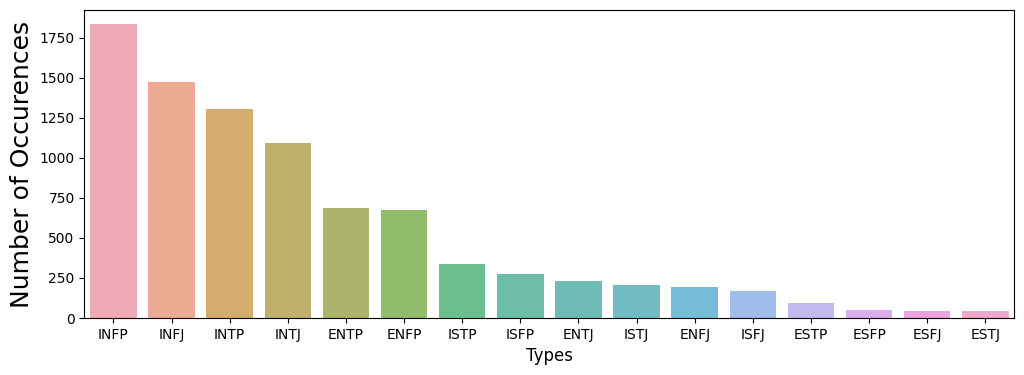

In [8]:
cnt_types = Personality['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=cnt_types.index,y=cnt_types.values,alpha=0.8)
plt.ylabel('Number of Occurences',fontsize=18)
plt.xlabel('Types',fontsize=12)
plt.show

ADD COLUMNS FOR THE TYPE INDICATORS

In [9]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
      
    if t[0] == 'I':I = 1
    elif t[0] == 'E':I = 0
    else: print('I-E incorrect') 

    if t[1] == 'N':N= 1
    elif t[1] == 'S':N= 0
    else: print('N-S incorrect') 

    if t[2] == 'T':T = 1
    elif t[2] == 'F':T= 0
    else: print('T-F incorrect') 

    if t[3] == 'J':J = 1
    elif t[3] == 'P':J = 0
    else: print('J-P incorrect') 
    return pd.Series( {'IE':I,'NS':N,'TF':T,'JP':J} )

Personality = Personality.join(Personality.apply (lambda row: get_types (row),axis=1))
Personality.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [10]:
print ("Introversion (I) / Extrovrersion(E):\t",Personality['IE'].value_counts()[0],"/",Personality['IE'].value_counts()[1])
print ("Intution (I) / Sensing(S):\t",Personality['NS'].value_counts()[0],"/",Personality['NS'].value_counts()[1])
print ("Thinking (I) / Feeling(F):\t",Personality['TF'].value_counts()[0],"/",Personality['TF'].value_counts()[1])
print ("Judging (I) / Perceiving(J):\t",Personality['JP'].value_counts()[0],"/",Personality['JP'].value_counts()[1])


Introversion (I) / Extrovrersion(E):	 1999 / 6676
Intution (I) / Sensing(S):	 1197 / 7478
Thinking (I) / Feeling(F):	 4694 / 3981
Judging (I) / Perceiving(J):	 5241 / 3434


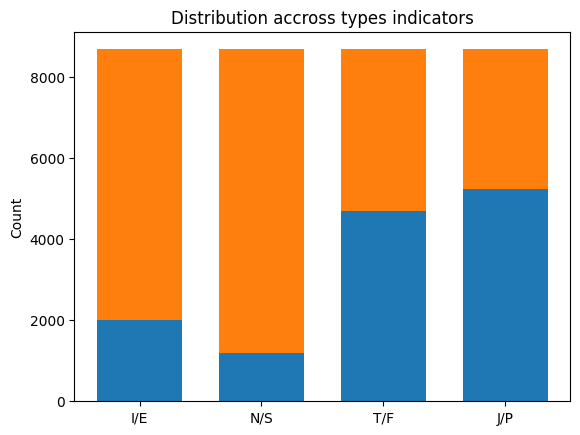

In [11]:
N = 4
but = (Personality['IE'].value_counts()[0],Personality['NS'].value_counts()[0],Personality['TF'].value_counts()[0],Personality['JP'].value_counts()[0])
top = (Personality['IE'].value_counts()[1],Personality['NS'].value_counts()[1],Personality['TF'].value_counts()[1],Personality['JP'].value_counts()[1])

ind = np.arange(N)  # here x Locations for the groups
width = 0.7       #Here width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,but,width)
p2 = plt.bar(ind,top,width,bottom=but)

plt.ylabel('Count')
plt.title('Distribution accross types indicators')
plt.xticks(ind,('I/E','N/S','T/F','J/P'))

plt.show()

PERSON FEATURES COREELATION

In [12]:
Personality[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


<Axes: title={'center': 'Person Features Correlation'}>

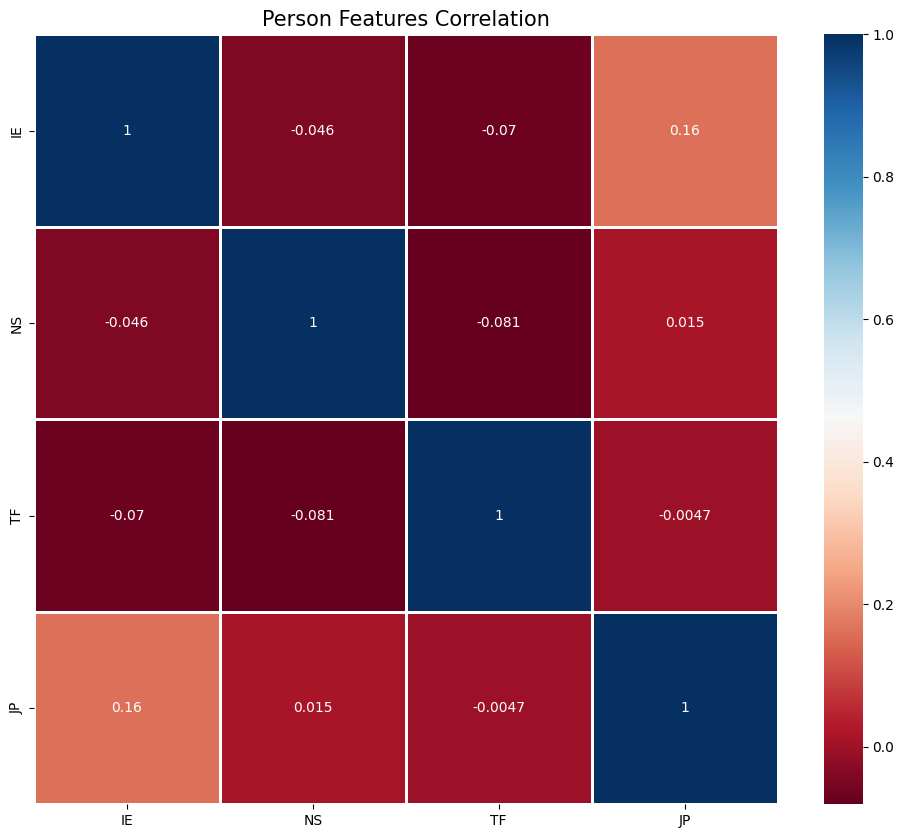

In [13]:
cmap = plt.cm.RdBu
corr = Personality[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title("Person Features Correlation",size=15)
sns.heatmap(corr,cmap=cmap,annot=True,linewidths=1)

PREPARING THE DATA

Binarize Type Indicator (Better implementation than mine above)

In [14]:
b_Pers = {'I':0,'E':1,'N':0,'S':1,'F':0,'T':1,'J':0,'P':1}
b_Pers_list = [{0:'I',1:'E'},{0:'N',1:'S'},{0:'F',1:'T'},{0:'J',1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

d = Personality.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarlize MBTI list: \n%s" % list_personality_bin)

Binarlize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [15]:
##### Compute list of subject with Type | list of comments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# We want to remove these from the posts
unique_type_list = ['INFJ','ENTP','INTP','INTJ','ENTJ','ENFJ','INFP','ENFP','ISFP','ISTP','ISFJ','ISTJ','ESTP','ESTJ','ESFJ']

unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize I
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed
cachedStopWords = stopwords.words("english")

def pre_process_Personality(Personality, remove_stop_words=True, remove_mbti_profiles=True):
    
    list_personality = []
    list_posts = []
    len_personality = len(Personality)
    i=0
    
    for row in Personality.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_personality):
            print("%s of %s rows" % (i,len_personality))
              
        ##### Remove and clean comments
        posts= row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +',' ',temp).lower()
        
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")
                             
        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)
        
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#LookupError:
#*******
# Resource wordnet not found.
# Please use the NLTK Downloader to obtain the resource:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
lists_posts,list_personality = pre_process_Personality(Personality,remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [20]:
print("Num posts and personalities:",lists_posts.shape,list_personality.shape)

Num posts and personalities: (8675,) (8675, 4)


In [21]:
lists_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [22]:
list_personality[0]

array([0, 0, 0, 0])

VECTORIZE WITH COUNT AND TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn. feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
cntizer = CountVectorizer(analyzer="word",
                              max_features=1500,
                              tokenizer=None,
                              preprocessor=None,
                              stop_words=None,
                              max_df=0.7,
                              min_df=0.1)

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")

X_cnt = cntizer.fit_transform(lists_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
x_tfidf = tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [24]:
features_names = list(enumerate(cntizer.get_feature_names_out()))
features_names

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [25]:
x_tfidf.shape

(8675, 792)

X/Y data

In [26]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % x_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08042209 0.06830218 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10331537 0.         0.04973404 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10984584 0.         0.         0.         0.08642509
 0.         0.         0.10488948 0.         0.         0.
 0.         0.         0.05188886 0.06824736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

In [27]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) - Sensing (s)",
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) - Perceiving (P)" ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) - Sensing (s)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) - Perceiving (P)


In [28]:
print ("MBTI 1st row: %s" % translate_back (list_personality [0, :]))
print("Y: Binarized MBTI 1st row: %s" % list_personality [0, :])

MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


FIRST XGBOOST MODEL FOR MBTI DATASET

In [29]:
# First XGBoost model for MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = x_tfidf

# Let's train type indicator individually
for l in range (len (type_indicators)):
    print("%s..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]
    
    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E)...


* IE: Introversion (I) / Extroversion (E) Accuracy: 76.74%
NS: Intuition (N) - Sensing (s)...
* NS: Intuition (N) - Sensing (s) Accuracy: 85.71%
FT: Feeling (F) - Thinking (T)...
* FT: Feeling (F) - Thinking (T) Accuracy: 72.37%
JP: Judging (J) - Perceiving (P)...
* JP: Judging (J) - Perceiving (P) Accuracy: 62.35%


MONITOR PERFORMANCE AND EARLY STOPPING

In [30]:
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s..." % (type_indicators[l]))
    
    Y = list_personality[:,l]
    
    # split data into train and test sets
    seed = 7
    test_size= 0.33
    X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=test_size, random_state= seed)
    
    # fit model on training data
    model = XGBClassifier()
    eval_set= [(X_test, y_test)]
    model.fit (X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators [1], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E)...


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.52262
[1]	validation_0-logloss:0.51775
[2]	validation_0-logloss:0.51555
[3]	validation_0-logloss:0.51275
[4]	validation_0-logloss:0.51185
[5]	validation_0-logloss:0.50823
[6]	validation_0-logloss:0.50769
[7]	validation_0-logloss:0.50701
[8]	validation_0-logloss:0.50738
[9]	validation_0-logloss:0.50777
[10]	validation_0-logloss:0.50854
[11]	validation_0-logloss:0.50875
[12]	validation_0-logloss:0.51030
[13]	validation_0-logloss:0.51090
[14]	validation_0-logloss:0.51181
[15]	validation_0-logloss:0.51276
[16]	validation_0-logloss:0.51272
[17]	validation_0-logloss:0.51237
* NS: Intuition (N) - Sensing (s) Accuracy: 77.54%
NS: Intuition (N) - Sensing (s)...


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.40564
[1]	validation_0-logloss:0.40118
[2]	validation_0-logloss:0.39530
[3]	validation_0-logloss:0.39450
[4]	validation_0-logloss:0.39509
[5]	validation_0-logloss:0.39365
[6]	validation_0-logloss:0.39427
[7]	validation_0-logloss:0.39380
[8]	validation_0-logloss:0.39318
[9]	validation_0-logloss:0.39435
[10]	validation_0-logloss:0.39313
[11]	validation_0-logloss:0.39263
[12]	validation_0-logloss:0.39284
[13]	validation_0-logloss:0.39307
[14]	validation_0-logloss:0.39405
[15]	validation_0-logloss:0.39511
[16]	validation_0-logloss:0.39605
[17]	validation_0-logloss:0.39648
[18]	validation_0-logloss:0.39798
[19]	validation_0-logloss:0.39832
[20]	validation_0-logloss:0.39902
* NS: Intuition (N) - Sensing (s) Accuracy: 85.82%
FT: Feeling (F) - Thinking (T)...


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66622
[1]	validation_0-logloss:0.65225
[2]	validation_0-logloss:0.64171
[3]	validation_0-logloss:0.63149
[4]	validation_0-logloss:0.62507
[5]	validation_0-logloss:0.62068
[6]	validation_0-logloss:0.61362
[7]	validation_0-logloss:0.60879
[8]	validation_0-logloss:0.60465
[9]	validation_0-logloss:0.59896
[10]	validation_0-logloss:0.59504
[11]	validation_0-logloss:0.58956
[12]	validation_0-logloss:0.58544
[13]	validation_0-logloss:0.58378
[14]	validation_0-logloss:0.58185
[15]	validation_0-logloss:0.58041
[16]	validation_0-logloss:0.57865
[17]	validation_0-logloss:0.57728
[18]	validation_0-logloss:0.57544
[19]	validation_0-logloss:0.57607
[20]	validation_0-logloss:0.57264
[21]	validation_0-logloss:0.57054
[22]	validation_0-logloss:0.57087
[23]	validation_0-logloss:0.57127
[24]	validation_0-logloss:0.56935
[25]	validation_0-logloss:0.57012
[26]	validation_0-logloss:0.56938
[27]	validation_0-logloss:0.57049
[28]	validation_0-logloss:0.56942
[29]	validation_0-loglos

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65518
[1]	validation_0-logloss:0.64993
[2]	validation_0-logloss:0.64907
[3]	validation_0-logloss:0.64735
[4]	validation_0-logloss:0.64768
[5]	validation_0-logloss:0.64917
[6]	validation_0-logloss:0.64857
[7]	validation_0-logloss:0.64842
[8]	validation_0-logloss:0.64754
[9]	validation_0-logloss:0.64899
[10]	validation_0-logloss:0.64972
[11]	validation_0-logloss:0.64990
[12]	validation_0-logloss:0.64975
[13]	validation_0-logloss:0.64937
* NS: Intuition (N) - Sensing (s) Accuracy: 63.05%


FEATURE IMPORTANCE PLOT AND LIST FOR THE FIRST INDICATOR:

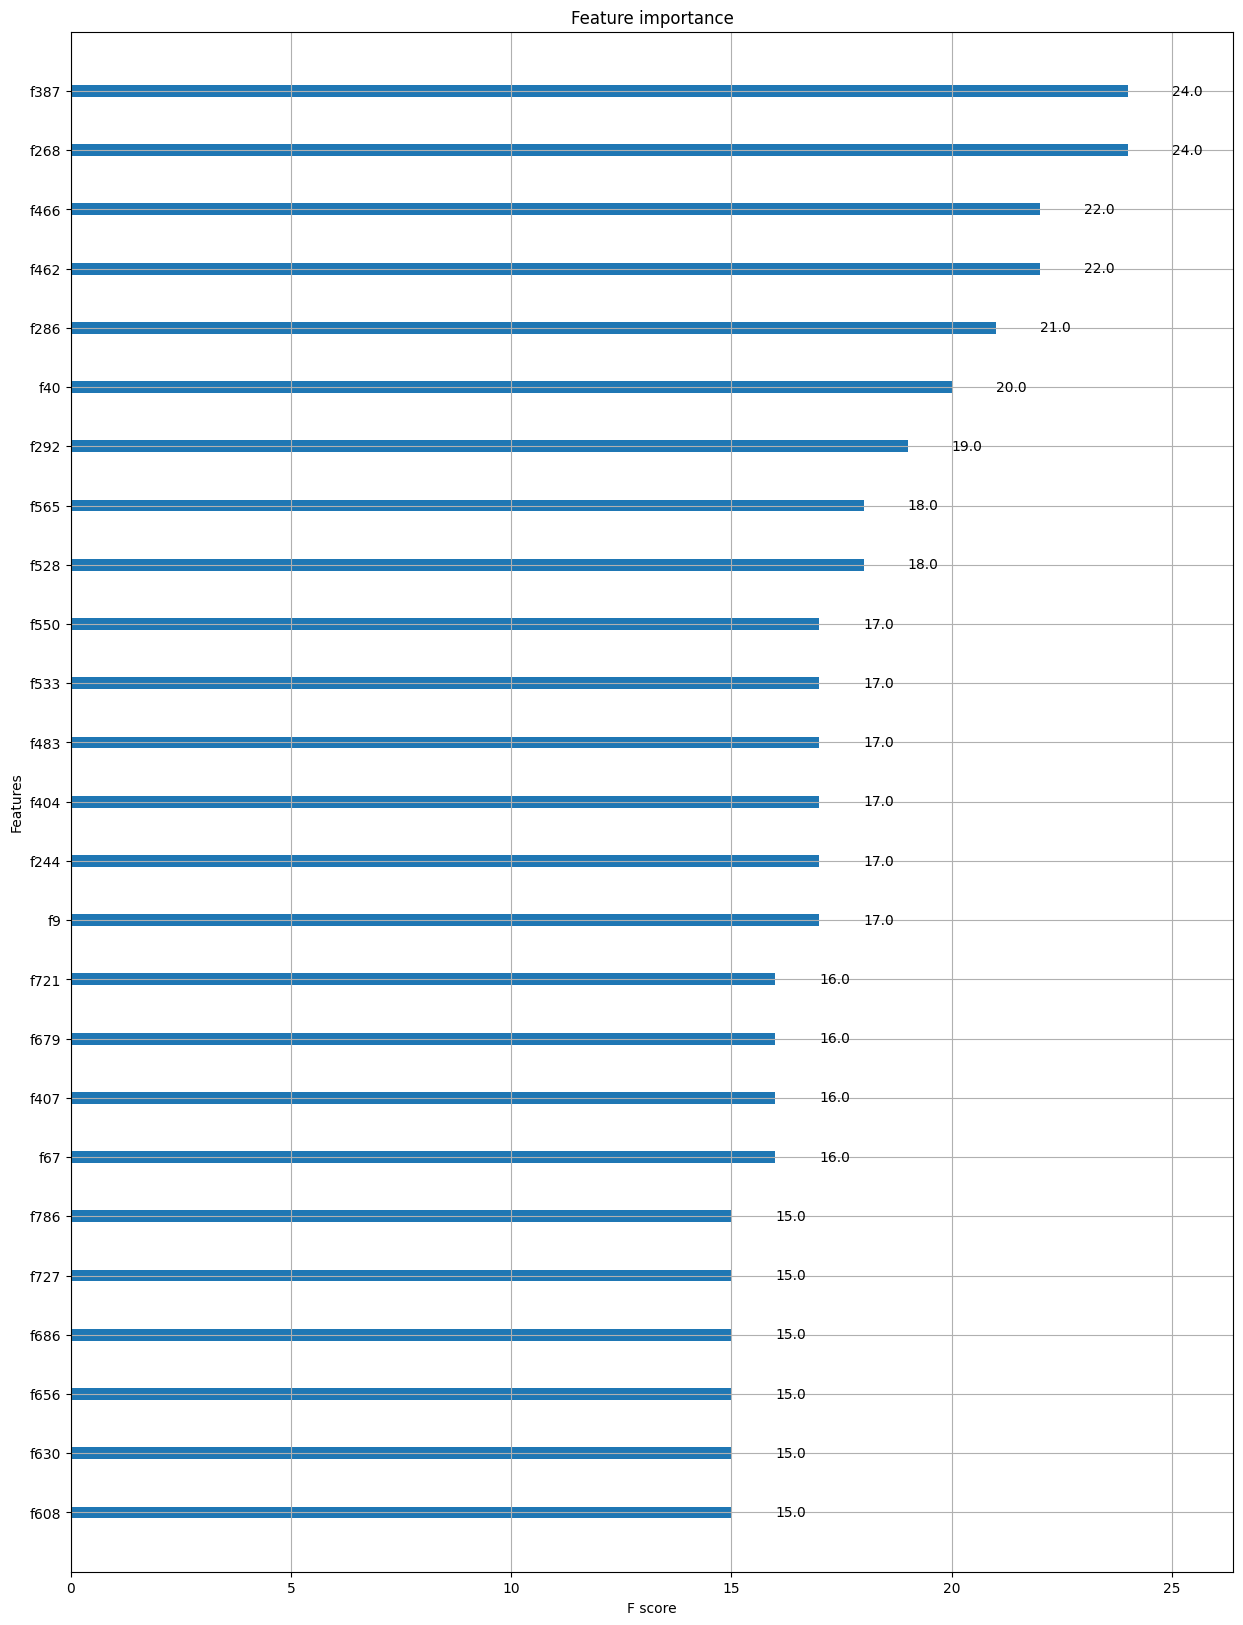

In [31]:
from xgboost import plot_importance

#Only the 1st indicator
y = list_personality[:,0]

# fit model on training data
model = XGBClassifier()
model.fit(X, y)

# plot feature importance
ax = plot_importance(model, max_num_features=25)

fig = ax.figure
fig.set_size_inches (15, 20)

plt.show() 

In [32]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],cntizer.get_feature_names_out()[f[0]]))
# Save xgb_params for late discussuin
default_get_xgb_params = model.get_xgb_params()

279	0.006412	given
397	0.005536	listening
462	0.005050	ne
14	0.004857	age
432	0.004262	memory
292	0.004242	guy
601	0.004172	seriously
602	0.004043	set
72	0.003908	blue
404	0.003836	lol
61	0.003832	become
671	0.003797	super
53	0.003754	awesome
123	0.003676	concept
552	0.003448	quiet
176	0.003379	discussion
536	0.003342	power
50	0.003236	avoid
293	0.003221	haha
579	0.003165	romantic
63	0.003121	behavior
394	0.003101	link
266	0.003089	fuck
348	0.003061	interest
791	0.003057	younger


In [33]:
#Save xgb_params
default_get_xgb_params = model.get_xgb_params()
print (default_get_xgb_params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [34]:
def plot_confusion_matrix(
        cm,
        classes,
        normalize=False,
        title="Confusion Matrix",
        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum (axis=1) [:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    thresh = cm.max() / 2
   
    for i, j in itertools.product (range (cm.shape [0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

NS: Intuition (N) - Sensing (s)...


* NS: Intuition (N) - Sensing (s) Accuracy: 78.73%
Confusion matrix, without normalization
[[2161   68]
 [ 541   93]]


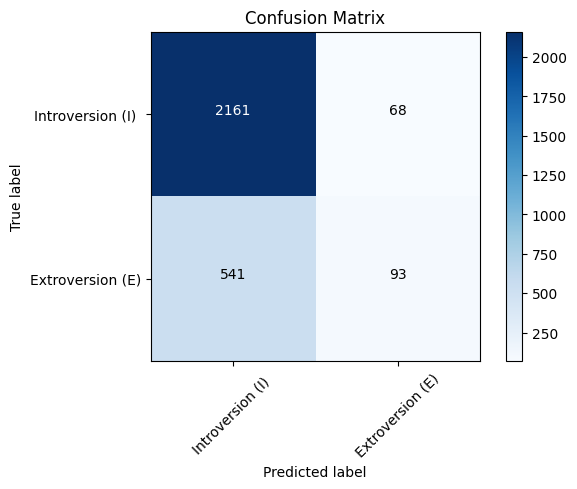

NS: Intuition (N) - Sensing (s)...
* NS: Intuition (N) - Sensing (s) Accuracy: 86.06%
Confusion matrix, without normalization
[[2454    9]
 [ 390   10]]


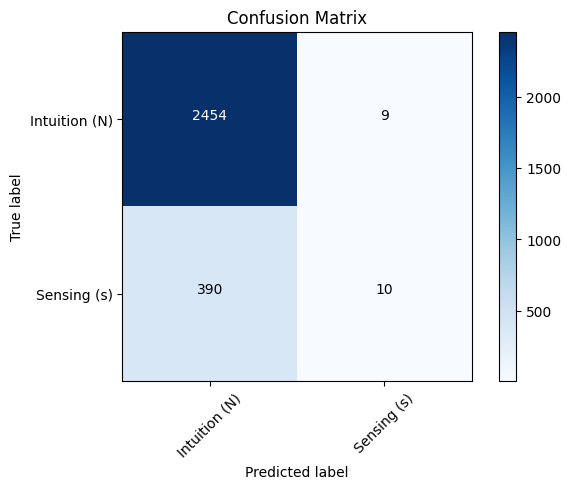

NS: Intuition (N) - Sensing (s)...
* NS: Intuition (N) - Sensing (s) Accuracy: 73.38%
Confusion matrix, without normalization
[[1186  368]
 [ 394  915]]


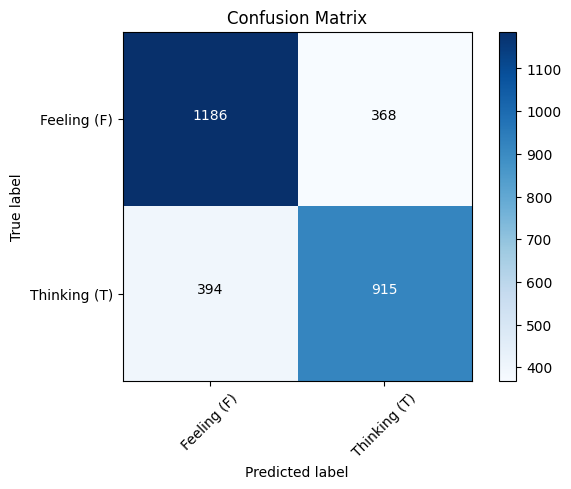

NS: Intuition (N) - Sensing (s)...
* NS: Intuition (N) - Sensing (s) Accuracy: 65.70%
Confusion matrix, without normalization
[[ 450  669]
 [ 313 1431]]


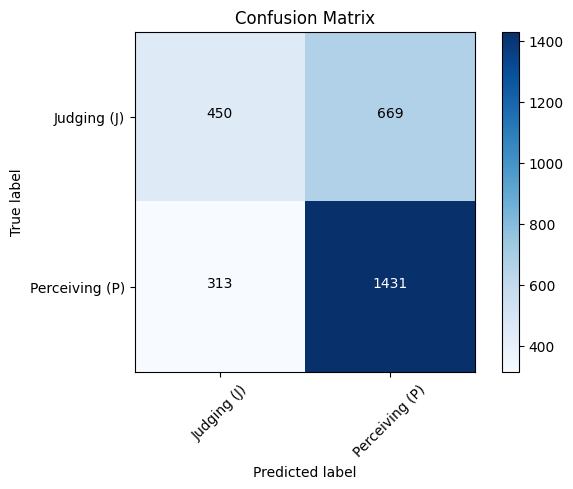

In [35]:
from sklearn.metrics import confusion_matrix
import itertools 
import re

# setup parameters for xgboost
param = {}

param['n_estimators'] = 200
param[ 'max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s..." % (type_indicators[1]))
    
    Y = list_personality[:,l]
    
    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train,X_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    #fit model on training data
    model=XGBClassifier (**param)
    model.fit(X_train,y_train)
    # make predictions for test data
    y_pred = model.predict (X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators [1], accuracy * 100.0))
    
    #confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_class = re.split('/ | - |: | - ', type_indicators[l])
    plot_confusion_matrix(cm, [cm_class [1], cm_class [2]], title="Confusion Matrix")

XGBOOST HYPERPARAMETER TUNING

In [36]:
#Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [37]:
# Posts in tf-idf representation
X = x_tfidf

In [38]:
# setup parameters for xgboost
param= {}
param['n_estimators'] = 200
param['max_depth'] = 2 
param['nthread'] = 8
param['learning_rate'] = 0.2

In [39]:
# Let's train type indicator individually
for l in range (len(type_indicators)):
    print("%s..." % (type_indicators[l]))

    Y = list_personality[:,1]
    model = XGBClassifier(**param)
    #learning_rate= [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    #param_grid = dict(learning_rate=learning_rate)
    
    print("hello")

IE: Introversion (I) / Extroversion (E)...
hello
NS: Intuition (N) - Sensing (s)...
hello
FT: Feeling (F) - Thinking (T)...
hello
JP: Judging (J) - Perceiving (P)...
hello


In [40]:
 param_grid = {
        'n_estimators' :[ 200 ,3001],
        'learning_rate': [ 0.2, 0.3]
        # 'learning_rate': [ 0.01, 0.1, 0.2, 0.3],
        # 'max_depth': [2,3,4],
     }

In [41]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search= GridSearchCV(model,param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)

In [42]:
# summarize results
print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

* Best: -0.369986 using {'learning_rate': 0.2, 'n_estimators': 200}


In [43]:
for mean, stdev, param in zip (means, stds, params):
        print("* %f (%f) with: %r" % (mean, stdev, param))

* -0.369986 (0.008972) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.540662 (0.016169) with: {'learning_rate': 0.2, 'n_estimators': 3001}
* -0.376050 (0.009750) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.648721 (0.027126) with: {'learning_rate': 0.3, 'n_estimators': 3001}


PREDICT OWN MYERS-BRIGGS PERSONALITY TYPE

In [45]:
# A few few tweets and blog post
my_posts = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out the
Awesome #AWS monitoring introduction.
HPE Software (now @MicroFocusSW) won the platinum reader's choice #ITAWARDS 2017 in the new category #CloudMonitoring
Certified as AWS Certified Solutions Architect
Hi, please have a look at my Udacity interview about online learning and machine learning,
Very interesting to see the lessons learnt during the HP Operations Orchestration to Cloudslang journey. http://bit.ly/1X041ci
I came across a post on devopsdigest.com and need your input: "70% DevOps organizations Unhappy with DevOps Monitoring Tools"
In a similar investigation I found out that many DevOps organizations use several monitoring tools in parallel. Senu, Nagios, Logstach and Saas offerings such as DataDog or SignalFX t
Sure, there are comercial tools on the market for exactly this use case but these tools are not necessarily optimized for DevOps.
So, here my question to you: In your DevOps project, have you encountered that the lack of consolidation of alerts and status is a real issue? If yes, how did you approach the problem
You will probably hear more and more about Chatops at conferences, DevOps meet-ups or simply from your co-worker at the coffee station. Chatops is a term and concept coined by GitHu
Now the question is: why and how would I, as an ops-focused engineer, implement and use Chatops in my organization? The next question then is: How to include my tools into the chat cc
Let's begin by having a look at a use case. The Closed Looped Incidents Process (CLIP) can be rejuvenated with Chatops. The work from the incident detection runs through monitoring ur
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. An Infrastructure as a Service platform"""

# The type is just a dummy so that the data prep fucntion can be reused
mydata = pd.DataFrame (data= { 'type': ['INFJ'], 'posts': [my_posts]})
my_posts, dummy = pre_process_Personality(mydata, remove_stop_words=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf = tfizer.transform (my_X_cnt).toarray()

1 of 1 rows


FIT AND PREDICT THE 4 TYPE INDICATORS:

In [47]:
# setup parameters for xgboost
param= {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param[ 'learning_rate'] = 0.2

result = []
# Let's train type indicator individually
for l in range (len (type_indicators)):
    print("%s..." % (type_indicators[l]))
    
    Y = list_personality[:,l]
    
    # split data into train and test sets.
    seed = 7
    test_size= 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    # fit model on training data I
    model=XGBClassifier (**param)
    model.fit(X_train, y_train)
    
    # make predictions for my data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_indicators [1], y_pred))

IE: Introversion (I) / Extroversion (E)...
NS: Intuition (N) - Sensing (s)...
FT: Feeling (F) - Thinking (T)...
JP: Judging (J) - Perceiving (P)...


RESULT

In [48]:
print("The result is:",translate_back(result))

The result is: INTJ
